In [154]:
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objects as go 
import numpy as np
from scipy.spatial import Voronoi, voronoi_plot_2d
from IPython.display import display
import time
import seaborn as sns
from statsmodels.stats.outliers_influence import variance_inflation_factor


# Load the datasets (ensure correct paths and files)
train_features = pd.read_csv('../data/processed_data/training_data.csv')
test_features = pd.read_csv('../data/processed_data/testing_data.csv')

In [155]:
train_features.describe()

,gameId,playId,play_type,week,quarter,gameClockSeconds,gameQuarterWeight,down,yardsToGo,yardsGained,...,playSuccessWeight,possessionTeamWinProbability,possessionTeamImpact,opponentTeamImpact,receiverAlignment,players_in_box_count,mismatchFound,motion_type,motion_player_count,pre_snap_time_duration
count,1.404000e+04,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000,...,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000,14040.000000
mean,2.022098e+09,2029.350000,0.564031,4.405271,2.573647,430.628419,1.487650,1.783262,8.461752,6.008761,...,2.260862,0.508371,0.001846,-0.001846,5.948006,6.562963,1.000000,1.520798,0.897650,10.440228
std,4.859946e+03,1186.104566,0.495901,2.285767,1.136958,271.552473,0.425776,0.822673,3.903307,8.684684,...,3.373278,0.295769,0.040755,0.040755,1.515409,1.156601,1.181873,2.025550,1.079698,4.202548
min,2.022091e+09,54.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,-61.000000,...,-22.047201,0.000803,-0.541161,-0.834887,1.000000,0.000000,0.000000,0.000000,0.000000,0.100000
25%,2.022092e+09,994.750000,0.000000,2.000000,2.000000,182.750000,1.200000,1.000000,6.000000,0.000000,...,0.344172,0.269143,-0.011961,-0.013007,5.000000,6.000000,0.000000,0.000000,0.000000,8.200000
50%,2.022100e+09,2022.000000,1.000000,4.000000,3.000000,421.000000,1.500000,2.000000,10.000000,4.000000,...,1.743237,0.520641,-0.000158,0.000158,5.000000,6.000000,0.000000,1.000000,1.000000,10.600000
75%,2.022102e+09,3032.000000,1.000000,6.000000,4.000000,667.000000,2.000000,2.000000,10.000000,9.000000,...,4.086599,0.751755,0.013007,0.011961,7.000000,7.000000,2.000000,2.000000,1.000000,12.800000
max,2.022103e+09,5120.000000,1.000000,8.000000,5.000000,900.000000,2.500000,4.000000,38.000000,98.000000,...,23.897972,0.999026,0.834887,0.541161,12.000000,11.000000,6.000000,5.000000,9.000000,96.000000


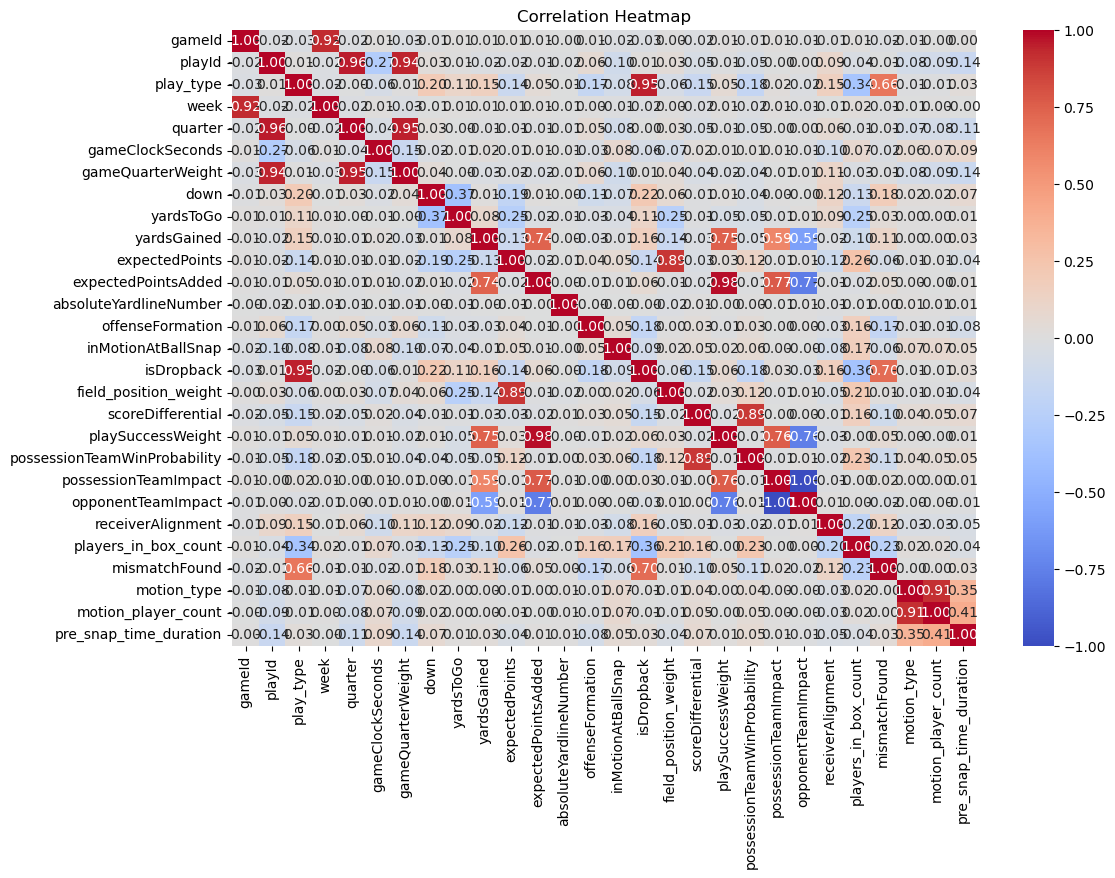

In [156]:
# OBSERVE THE FEATURE CORRELATION HEAT MAP BEFORE REFINING
corr = train_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [157]:
# Removing Post-Snap Features
post_snap_features = [
    'yardsGained',
    'expectedPointsAdded',
    'isDropback',
    'playSuccessWeight',
    'possessionTeamWinProbability',
    'possessionTeamImpact',
    'opponentTeamImpact'
]

train_features = train_features.drop(columns=post_snap_features, axis=1)

In [158]:
# Assuming train_features contains all your features and 'pff_manZone' is the column you want to predict
train_labels = train_features['play_type']

# Drop 'pff_manZone' from train_features to avoid data leakage
train_features = train_features.drop(columns=['play_type'])

target_corr = train_features_no_target.corrwith(train_labels)  # Assuming `train_labels` contains your target variables
print(target_corr)

gameId                   -0.015586
playId                   -0.001785
week                     -0.010076
quarter                  -0.002995
gameClockSeconds         -0.009771
gameQuarterWeight        -0.001517
down                     -0.007447
yardsToGo                 0.003179
expectedPoints           -0.001941
absoluteYardlineNumber    0.002204
offenseFormation         -0.006043
inMotionAtBallSnap        0.012199
field_position_weight    -0.000823
scoreDifferential        -0.011018
receiverAlignment         0.001587
players_in_box_count     -0.001876
mismatchFound             0.003038
motion_type               0.009347
motion_player_count       0.009913
pre_snap_time_duration   -0.008417
dtype: float64


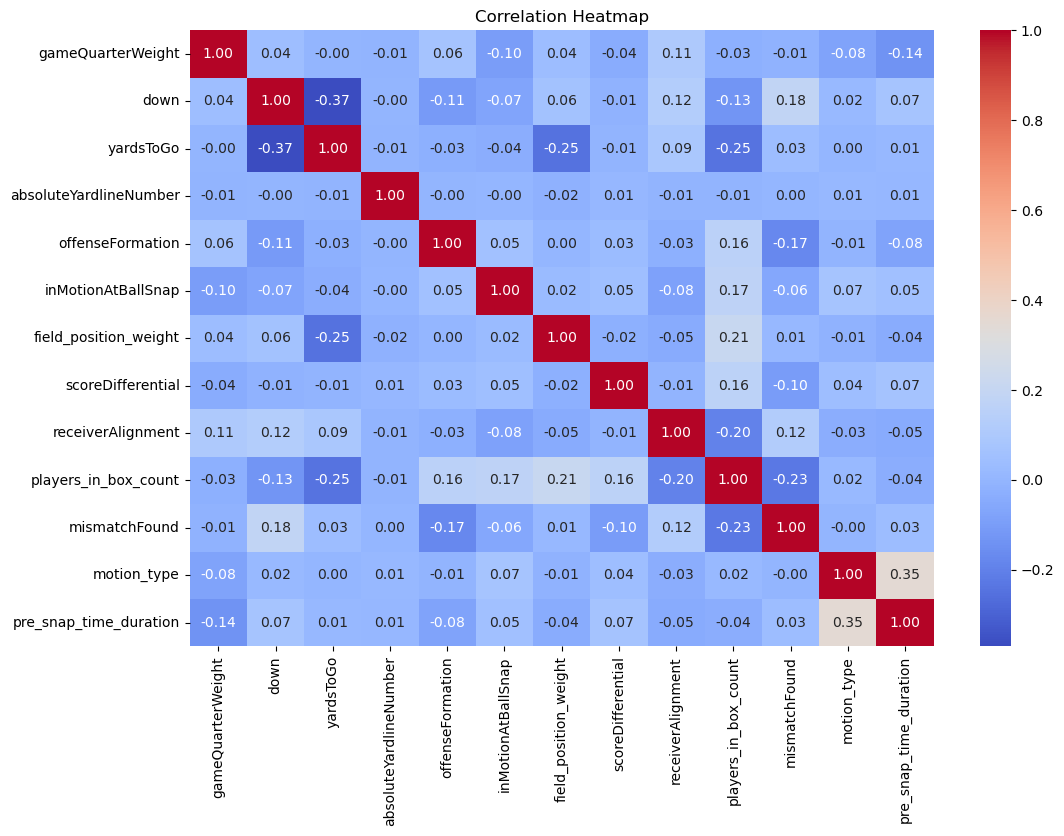

In [159]:
# Removing Poor Correlation Features
poor_corr_features = [
    'gameId',
    'playId',
    'week',
    'quarter',
    'gameClockSeconds',
    'expectedPoints',
    'motion_player_count'
]

train_features = train_features.drop(columns=poor_corr_features, axis=1)

# OBSERVE THE FEATURE CORRELATION HEAT MAP BEFORE REFINING
corr = train_features.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(corr, annot=True, cmap="coolwarm", fmt='.2f')
plt.title("Correlation Heatmap")
plt.show()

In [160]:
# Calculate VIF for each feature
X = train_features # Without the target
#X = X.dropna(subset=['pre_snap_time_duration']) # Removing 4 NA rows
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                   Feature        VIF
0        gameQuarterWeight  12.657837
1                     down   6.528199
2                yardsToGo   6.133149
3   absoluteYardlineNumber   6.734206
4         offenseFormation   7.212876
5       inMotionAtBallSnap   1.454238
6    field_position_weight   4.841524
7        scoreDifferential   1.058424
8        receiverAlignment  15.255969
9     players_in_box_count  23.174370
10           mismatchFound   1.888988
11             motion_type   1.789126
12  pre_snap_time_duration   7.779048


In [161]:
train_features.to_csv('../data/processed_data/training_features.csv', index=False)
train_labels.to_csv('../data/processed_data/train_labels.csv', index=False)

In [153]:
from sklearn.metrics import roc_auc_score, classification_report

# Fit the best models and predict
best_log_reg = grid_search_lr.best_estimator_
best_rf = grid_search_rf.best_estimator_

log_reg_pred = best_log_reg.predict(X_test_scaled)
rf_pred = best_rf.predict(X_test_scaled)

# Print Accuracy
print("Logistic Regression Accuracy:", accuracy_score(y_test, log_reg_pred))
print("Random Forest Accuracy:", accuracy_score(y_test, rf_pred))

# Print Classification Report for each model
print("Logistic Regression Classification Report:\n", classification_report(y_test, log_reg_pred))
print("Random Forest Classification Report:\n", classification_report(y_test, rf_pred))

# ROC-AUC Score
print("Logistic Regression ROC-AUC:", roc_auc_score(y_test, log_reg_pred))
print("Random Forest ROC-AUC:", roc_auc_score(y_test, rf_pred))


Logistic Regression Accuracy: 1.0
Random Forest Accuracy: 1.0
Logistic Regression Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1230
           1       1.00      1.00      1.00      1578

    accuracy                           1.00      2808
   macro avg       1.00      1.00      1.00      2808
weighted avg       1.00      1.00      1.00      2808

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      1230
           1       1.00      1.00      1.00      1578

    accuracy                           1.00      2808
   macro avg       1.00      1.00      1.00      2808
weighted avg       1.00      1.00      1.00      2808

Logistic Regression ROC-AUC: 1.0
Random Forest ROC-AUC: 1.0


In [102]:
# Exporting training and testing without NA values and VIF features
train_features.to_csv('../data/processed_data/training_features.csv', index=False)
train_labels.to_csv('../data/processed_data/training_target_features.csv', index=False)